<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/preprocessing_and_decomposition/Seasonality_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Seasonality Decomposition

A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

Level: The average value in the series.
Trend: The increasing or decreasing value in the series.
Seasonality: The repeating short-term cycle in the series.
Noise: The random variation in the series.

A series is thought to be an aggregate or combination of these four components.

All series have a level and noise. The trend and seasonality components are optional.

It is helpful to think of the components as combining either additively or multiplicatively.

## Introduction

###Additive Decomposition

Because the time series was contrived and was provided as an array of numbers, we must specify the frequency of the observations (the freq=1 argument). If a Pandas Series object is provided, this argument is not required.



In [5]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
import numpy as np
import pandas as pd
## example data importing
data = pd.read_csv('https://raw.githubusercontent.com/iotanalytics/IoTTutorial/main/data/SCG_data.csv').drop('Unnamed: 0',1).to_numpy()[0:20,:1000]

<Figure size 1152x432 with 0 Axes>

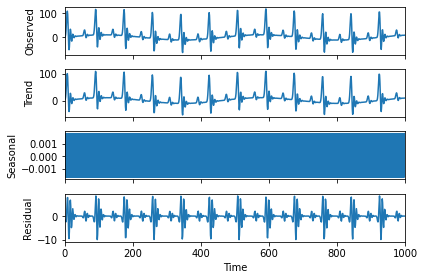

In [16]:


# series = [i+randrange(10) for i in range(1,100)]
pyplot.figure(figsize=(16,6))
series = data[10,:]
result = seasonal_decompose(series, model='additive', freq=3)
result.plot()
pyplot.show()


###Multiplicative Decomposition
We can decompose it assuming a multiplicative model.

In [17]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

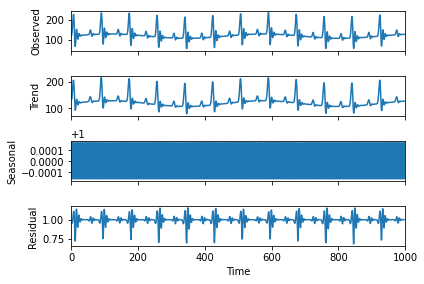

In [27]:

# series = [i**2.0 for i in range(1,100)]
series = data[10,:]+max(abs(data[10,:]))

result = seasonal_decompose(series, model='multiplicative', freq=5)
result.plot()
pyplot.show()

## Discussion

This is a useful abstraction.

Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem.

It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model.

Each of these components are something you may need to think about and address during data preparation, model selection, and model tuning. You may address it explicitly in terms of modeling the trend and subtracting it from your data, or implicitly by providing enough history for an algorithm to model a trend if it may exist.

You may or may not be able to cleanly or perfectly break down your specific time series as an additive or multiplicative model.

Real-world problems are messy and noisy. There may be additive and multiplicative components. There may be an increasing trend followed by a decreasing trend. There may be non-repeating cycles mixed in with the repeating seasonality components.

Nevertheless, these abstract models provide a simple framework that you can use to analyze your data and explore ways to think about and forecast your problem.

Pros:

Easy implementation

Low computational complexity

Cons:

Sensetive to extram value.

Pre-determination of parameter frequency.


## Reference
Section 2.2 Time Series Components, Practical Time Series Forecasting with R: A Hands-On Guide.


Section 6.3, Classical Decomposition, Forecasting: principles and practice